In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/Sreemanto/DSP-55/main/weatherAUS.csv')

1.create train/test/validation split
2.indentify input and target columns
3.identify numeric and categorical columns
4.impute missing numeric values
5.scale numeric values to the 0-1 range
6.encode categorical columns to one-hot vectors

In [5]:
df.head()  #RainTomorrow is target

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [6]:
df.shape

(145460, 23)

In [7]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [8]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [9]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [10]:
df.RainToday.value_counts()

No     110319
Yes     31880
Name: RainToday, dtype: int64

In [11]:
df.RainTomorrow.value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [12]:
df.dropna(subset = ['RainTomorrow'], inplace = True)

### 1. Training, validation and test sets

<AxesSubplot:title={'center':'No. of Rows per Year'}, xlabel='Date', ylabel='count'>

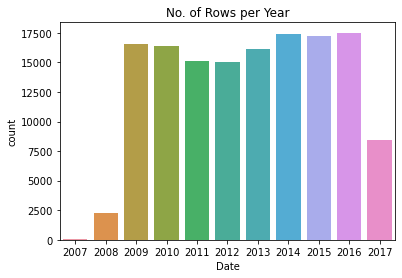

In [13]:
plt.title('No. of Rows per Year')
sns.countplot(x = pd.to_datetime(df.Date).dt.year)

while working with chronological data, it's often a good idea to separate the training, validation and test sets with time, so that the model is trained on data from the past and evaluated on data from the future.

we'll use the date till 2014 for training set, data from 2015 for validation set and data from 2016 & 2017 for testing set

In [14]:
year = pd.to_datetime(df.Date).dt.year

train_df = df[year <  2015]
val_df   = df[year == 2015]
test_df  = df[year >  2015]

In [15]:
print('train_df.shape :', train_df.shape)
print('val_df.shape   :', val_df.shape)
print('test_df.shape  :', test_df.shape)

train_df.shape : (98988, 23)
val_df.shape   : (17231, 23)
test_df.shape  : (25974, 23)


### 2. Input and Target columns

In [16]:
input_cols = list(train_df.columns)[1:-1]  ### x
target_col = 'RainTomorrow'                ### y

In [17]:
train_inputs  = train_df[input_cols].copy()  # x_train
train_targets = train_df[target_col].copy() # y_train

In [18]:
val_inputs  = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [19]:
test_inputs   = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

### 3. Numerical and categorical columns

In [20]:
numeric_cols = train_inputs.select_dtypes(include = np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [21]:
print('num cols:', numeric_cols)
print('cat cols:', categorical_cols)

num cols: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
cat cols: ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


### 4. Imputing null values

In [22]:
from sklearn.impute import SimpleImputer

In [23]:
imputer = SimpleImputer(strategy = 'mean').fit(df[numeric_cols])

In [24]:
#execute the imputer

#first on numeric columns

train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])

val_inputs[numeric_cols]   = imputer.transform(val_inputs[numeric_cols])

test_inputs[numeric_cols]  = imputer.transform(test_inputs[numeric_cols])

In [25]:
train_inputs[numeric_cols].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [26]:
#now impute on categorical columns

imputer = SimpleImputer(strategy = 'most_frequent').fit(df[categorical_cols])

In [27]:
train_inputs[categorical_cols] = imputer.transform(train_inputs[categorical_cols])
val_inputs[categorical_cols]   = imputer.transform(val_inputs[categorical_cols])
test_inputs[categorical_cols]  = imputer.transform(test_inputs[categorical_cols])

In [28]:
test_inputs[categorical_cols].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

### 5. Scaling Numeric Features
scaling is generally not needed in decision trees. but as a general practice we are doing

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
scaler = MinMaxScaler().fit(df[numeric_cols])

In [31]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols]   = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols]  = scaler.transform(test_inputs[numeric_cols])

In [32]:
val_inputs.describe().loc[['min','max']]  #just verifying for min max scaling

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
min,0.007075,0.030246,0.000000,0.000000,0.0,0.007752,0.000000,0.000000,0.04,0.0,0.125620,0.0816,0.000000,0.000000,0.021097,0.026871
max,0.952830,0.948960,0.666307,0.485517,1.0,1.000000,0.669231,0.850575,1.00,1.0,0.971901,0.9632,0.888889,0.888889,0.943038,0.925144


### 6. Encoding Categorical Data

In [33]:
from sklearn.preprocessing import OneHotEncoder

In [34]:
encoder = OneHotEncoder(sparse = False, handle_unknown = 'ignore').fit(df[categorical_cols])

In [35]:
encoded_cols = list(encoder.get_feature_names(categorical_cols))

In [36]:
encoded_cols

['Location_Adelaide',
 'Location_Albany',
 'Location_Albury',
 'Location_AliceSprings',
 'Location_BadgerysCreek',
 'Location_Ballarat',
 'Location_Bendigo',
 'Location_Brisbane',
 'Location_Cairns',
 'Location_Canberra',
 'Location_Cobar',
 'Location_CoffsHarbour',
 'Location_Dartmoor',
 'Location_Darwin',
 'Location_GoldCoast',
 'Location_Hobart',
 'Location_Katherine',
 'Location_Launceston',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Mildura',
 'Location_Moree',
 'Location_MountGambier',
 'Location_MountGinini',
 'Location_Newcastle',
 'Location_Nhil',
 'Location_NorahHead',
 'Location_NorfolkIsland',
 'Location_Nuriootpa',
 'Location_PearceRAAF',
 'Location_Penrith',
 'Location_Perth',
 'Location_PerthAirport',
 'Location_Portland',
 'Location_Richmond',
 'Location_Sale',
 'Location_SalmonGums',
 'Location_Sydney',
 'Location_SydneyAirport',
 'Location_Townsville',
 'Location_Tuggeranong',
 'Location_Uluru',
 'Location_WaggaWagga',
 'Location_Walpole',
 'Locat

In [37]:
#train test and val all were derived from mother df
#its important that we reset the index to zero for all them as we will combine data later

In [38]:
train_inputs.reset_index(drop = True, inplace = True)
val_inputs.reset_index(drop = True, inplace = True)
test_inputs.reset_index(drop = True, inplace = True)


In [39]:
#code which converts the encoded value to dummy and puts it in teh dataframe

# pd.DataFrame(encoder.transform(train_inputs[categorical_cols]))

In [40]:
train_inputs[encoded_cols] = pd.DataFrame(encoder.transform(train_inputs[categorical_cols]))
val_inputs[encoded_cols]   = pd.DataFrame(encoder.transform(val_inputs[categorical_cols]))
test_inputs[encoded_cols]  = pd.DataFrame(encoder.transform(test_inputs[categorical_cols]))

In [41]:
#as a final step, let's drop the textual categorical columns, so that we're left with just numeric data

In [42]:
x_train = train_inputs[numeric_cols + encoded_cols]
x_val   = val_inputs[numeric_cols + encoded_cols]
x_test  = test_inputs[numeric_cols + encoded_cols]

In [43]:
x_train.isnull().sum()

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          0
                 ..
WindDir3pm_WSW    0
WindDir3pm_nan    0
RainToday_No      0
RainToday_Yes     0
RainToday_nan     0
Length: 119, dtype: int64

In [44]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [45]:
%%time

model.fit(x_train, train_targets)

Wall time: 5.73 s


DecisionTreeClassifier()

### Evaluation

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [47]:
train_preds = model.predict(x_train)

In [48]:
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [49]:
train_probs = model.predict_proba(x_train)

In [50]:
train_probs

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

seems like the decision tree is quite confident about its predictions. Let's check the acccuracy of its predicitons.

In [51]:
accuracy_score(train_targets, train_preds)   #overfitting

0.9999797955307714

### Feature Importance

In [52]:
#determining which feature is the most important

importance_df = pd.DataFrame({
    'feature' : x_train.columns,
    'importance' : model.feature_importances_
}).sort_values('importance', ascending = False)

In [54]:
importance_df.head()

,feature,importance
9,Humidity3pm,0.261805
11,Pressure3pm,0.060997
2,Rainfall,0.060005
5,WindGustSpeed,0.056180
4,Sunshine,0.050519


<AxesSubplot:title={'center':'Feature Importance'}, xlabel='importance', ylabel='feature'>

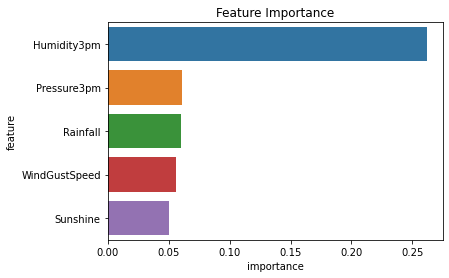

In [55]:
plt.title('Feature Importance')
sns.barplot(x = 'importance', y= 'feature', data = importance_df.head())

### Hyperparameter Tuning and overfitting

In [59]:
model = DecisionTreeClassifier(max_depth = 3)
model.fit(x_train, train_targets)
model.score(x_train, train_targets)

0.8291308037337859

In [60]:
model.score(x_val, val_targets)

0.8334397307178921

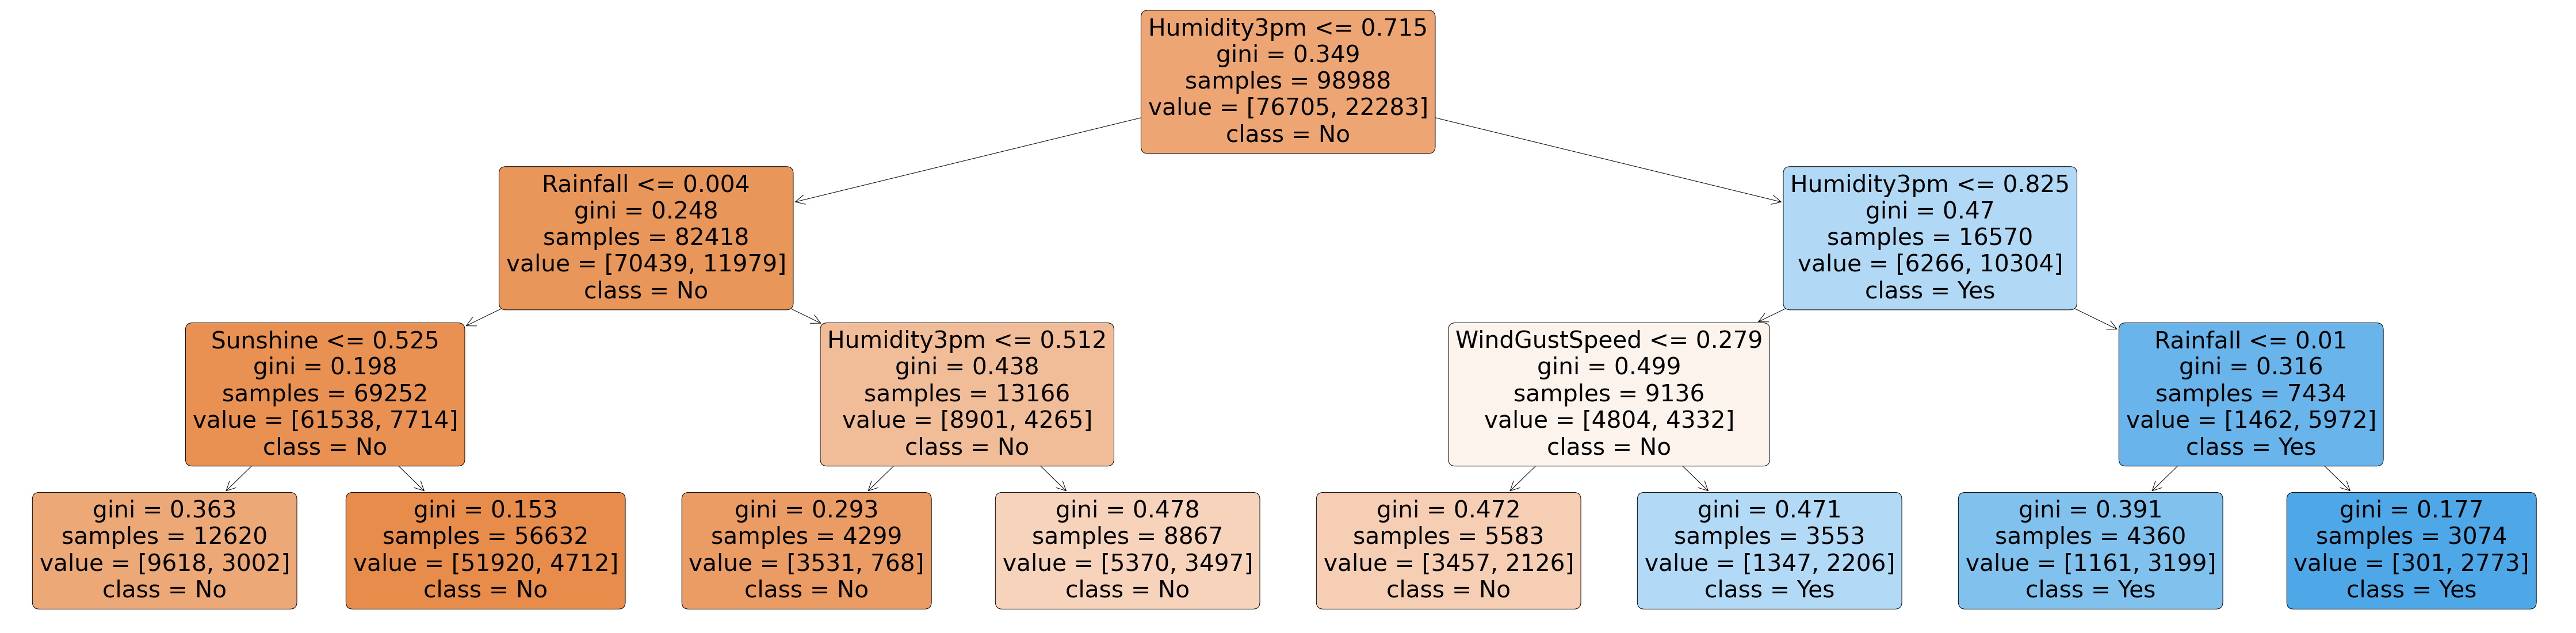

In [65]:
from sklearn.tree import plot_tree

plt.figure(figsize = (80,20))
plot_tree(model, feature_names = x_train.columns, filled = True, rounded = True, class_names = model.classes_)
plt.show()

### Lets experiment with different depths using a helper function

In [66]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth = md)
    model.fit(x_train, train_targets)
    train_error = 1 - model.score(x_train, train_targets)
    val_error   = 1 - model.score(x_val, val_targets)
    return {'Max Depth': md, 'Training error' : train_error, 'Validation error': val_error}

In [67]:
%%time

errors_df = pd.DataFrame([max_depth_error(md) for md in range(1,21)])
errors_df

Wall time: 1min 8s


,Max Depth,Training error,Validation error
0,1,0.184315,0.177935
1,2,0.179547,0.172712
2,3,0.170869,0.166560
3,4,0.165707,0.164355
4,5,0.160676,0.159074
5,6,0.156211,0.157275
6,7,0.153231,0.154721
7,8,0.147715,0.157449
8,9,0.140896,0.156636
9,10,0.132865,0.157507


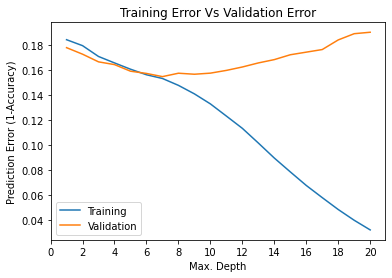

In [69]:
plt.figure()

plt.plot(errors_df['Max Depth'], errors_df['Training error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation error'])

plt.title('Training Error Vs Validation Error')
plt.xticks(range(0,21,2))
plt.xlabel('Max. Depth')

plt.ylabel('Prediction Error (1-Accuracy)')

plt.legend(['Training', 'Validation'])

In [70]:
## we can see that max depth about 7 is having good combination of training and validation error

In [71]:
model = DecisionTreeClassifier(max_depth = 7).fit(x_train, train_targets)
model.score(x_val, val_targets)

0.8452788578724392

In [74]:
model.score(x_val, val_targets)

0.8452788578724392

In [75]:
test_preds = model.predict(x_test)
val_preds = model.predict(x_val)

In [79]:
from sklearn.metrics import classification_report
print(classification_report(test_targets, test_preds))

              precision    recall  f1-score   support

          No       0.85      0.95      0.90     20028
         Yes       0.73      0.42      0.53      5946

    accuracy                           0.83     25974
   macro avg       0.79      0.69      0.71     25974
weighted avg       0.82      0.83      0.81     25974



In [80]:
print(classification_report(val_targets, val_preds))

              precision    recall  f1-score   support

          No       0.86      0.96      0.91     13583
         Yes       0.75      0.41      0.53      3648

    accuracy                           0.85     17231
   macro avg       0.80      0.69      0.72     17231
weighted avg       0.83      0.85      0.83     17231

